In [5]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel("hotdog_data.xlsx")

df.head()


,Timestamp,What year are you in?,Is hotdog a sandwich?
0,2025-08-29 17:17:56.622,4,Yes
1,2025-08-29 18:33:07.653,3,Yes
2,2025-08-29 18:33:08.405,4,Yes
3,2025-08-29 18:33:28.632,3,Yes
4,2025-08-29 18:33:41.234,1,No


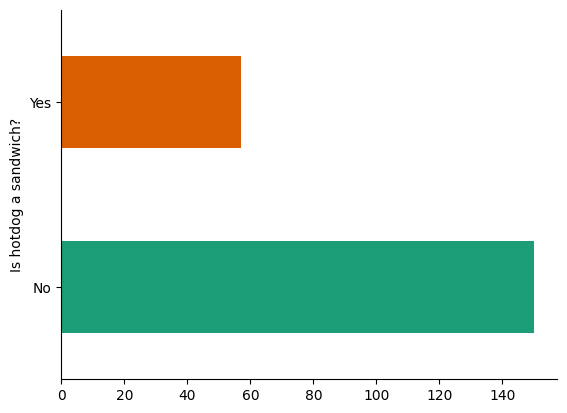

In [6]:
# @title Is hotdog a sandwich?

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Is hotdog a sandwich?').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [7]:
year_counts = df['What year are you in?'].value_counts()
display(year_counts)

,count
What year are you in?,
4,114
3,45
2,40
1,8


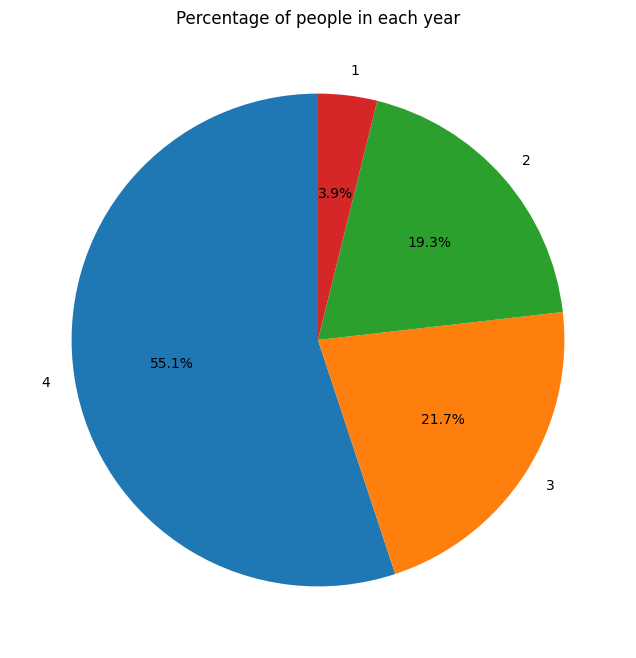

In [8]:
plt.figure(figsize=(8, 8))
plt.pie(year_counts, labels=year_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of people in each year')
plt.show()

# Task
Build a bar graph using the data from "hotdog_data.xlsx" that shows the number of people who voted yes/no on the question "Is hotdog a sandwich?" based on their year in school.

## Load the data

### Subtask:
Load the data from "hotdog_data.xlsx" into a pandas DataFrame.


**Reasoning**:
Load the data from "hotdog_data.xlsx" into a pandas DataFrame.



In [18]:
df = pd.read_excel("hotdog_data.xlsx")

**Reasoning**:
Display the head of the dataframe to verify that the data was loaded correctly.



In [19]:
display(df.head())

,Timestamp,What year are you in?,Is hotdog a sandwich?
0,2025-08-29 17:17:56.622,4,Yes
1,2025-08-29 18:33:07.653,3,Yes
2,2025-08-29 18:33:08.405,4,Yes
3,2025-08-29 18:33:28.632,3,Yes
4,2025-08-29 18:33:41.234,1,No


## Group and count

### Subtask:
Group the DataFrame by the 'What year are you in?' and 'Is hotdog a sandwich?' columns and count the occurrences of each combination.


**Reasoning**:
Group the DataFrame by the specified columns and count the occurrences of each combination, then unstack the result.



In [20]:
grouped_counts = df.groupby(['What year are you in?', 'Is hotdog a sandwich?']).size().unstack()
display(grouped_counts)

Is hotdog a sandwich?,No,Yes
What year are you in?,,
1,8.0,NaN
2,30.0,10.0
3,34.0,11.0
4,78.0,36.0


## Visualize the data

### Subtask:
Create a grouped bar chart to visualize the counts from the previous step.


**Reasoning**:
Create a grouped bar chart from the `grouped_counts` DataFrame to visualize the number of 'Yes' and 'No' responses for each year.



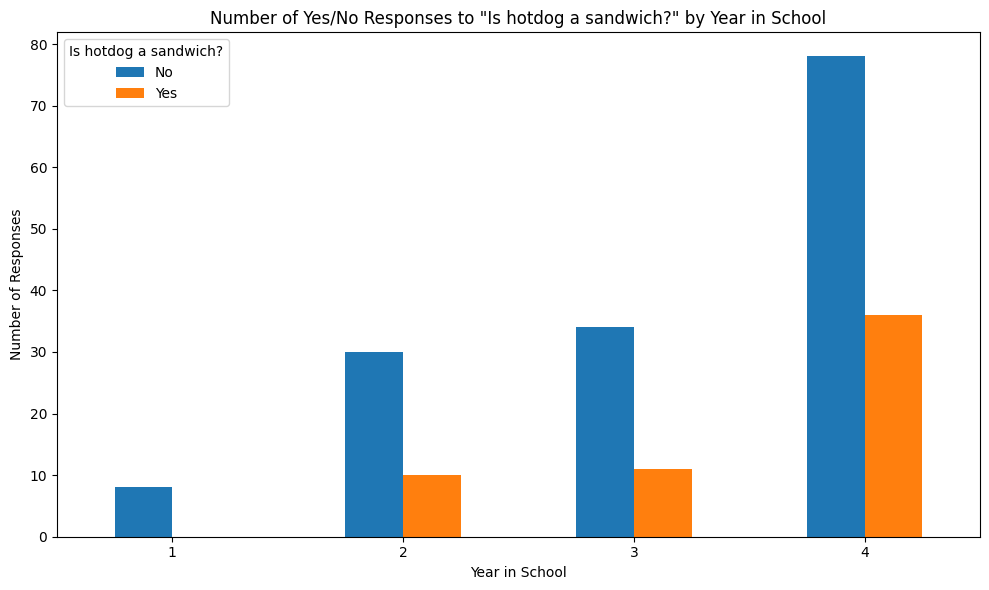

In [21]:
grouped_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Number of Yes/No Responses to "Is hotdog a sandwich?" by Year in School')
plt.xlabel('Year in School')
plt.ylabel('Number of Responses')
plt.xticks(rotation=0)
plt.legend(title='Is hotdog a sandwich?')
plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

*   The data was successfully loaded from the "hotdog\_data.xlsx" file.
*   The data was grouped by the 'What year are you in?' and 'Is hotdog a sandwich?' columns to count the occurrences of each combination.
*   The counts were unstacked to create a table with 'Year in School' as the index and 'Yes'/'No' as columns.
*   There were no students in year 1 who voted "Yes".
*   A grouped bar chart was successfully generated to visualize the distribution of "Yes" and "No" responses by year in school.
*   The plot was enhanced with a title, axis labels, and a legend.

### Insights or Next Steps

*   The visualization clearly shows the breakdown of opinions on whether a hotdog is a sandwich across different year levels.
*   Further analysis could involve calculating the percentage of "Yes" and "No" votes within each year to see if there is a proportional difference in opinion between years.


# Task
Generate a line graph using the data from "hotdog_data.xlsx" to visualize the number of responses over time, with time on the x-axis and the number of responses on the y-axis. Include separate lines for each year to show the response trends for different years.

## Load the data

### Subtask:
Load the data from "hotdog_data.xlsx" into a pandas DataFrame.


**Reasoning**:
Load the data from "hotdog_data.xlsx" into a pandas DataFrame and display the head.



In [23]:
df = pd.read_excel("hotdog_data.xlsx")
display(df.head())

,Timestamp,What year are you in?,Is hotdog a sandwich?
0,2025-08-29 17:17:56.622,4,Yes
1,2025-08-29 18:33:07.653,3,Yes
2,2025-08-29 18:33:08.405,4,Yes
3,2025-08-29 18:33:28.632,3,Yes
4,2025-08-29 18:33:41.234,1,No


## Extract full timestamp

### Subtask:
Combine the date and time from the 'Timestamp' column into a single datetime object.


**Reasoning**:
Convert the 'Timestamp' column to datetime objects and assign it to a new 'Full_Timestamp' column.



In [24]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Full_Timestamp'] = df['Timestamp']
display(df[['Timestamp', 'Full_Timestamp']].head())

,Timestamp,Full_Timestamp
0,2025-08-29 17:17:56.622,2025-08-29 17:17:56.622
1,2025-08-29 18:33:07.653,2025-08-29 18:33:07.653
2,2025-08-29 18:33:08.405,2025-08-29 18:33:08.405
3,2025-08-29 18:33:28.632,2025-08-29 18:33:28.632
4,2025-08-29 18:33:41.234,2025-08-29 18:33:41.234


## Group and count responses

### Subtask:
Group the data by year and a suitable time bin (e.g., hour) and count the number of responses.


**Reasoning**:
Group the data by year and resample by hour to count responses per hour per year.



In [25]:
responses_per_hour_per_year = df.set_index('Full_Timestamp').groupby('What year are you in?').resample('h').size().reset_index(name='Response Count')
display(responses_per_hour_per_year.head())

,What year are you in?,Full_Timestamp,Response Count
0,1,2025-08-29 18:00:00,3
1,1,2025-08-29 19:00:00,2
2,1,2025-08-29 20:00:00,0
3,1,2025-08-29 21:00:00,0
4,1,2025-08-29 22:00:00,0


## Visualize the data

### Subtask:
Create a line graph with time on the x-axis, the number of responses on the y-axis, and separate lines for each year.


**Reasoning**:
Create a line plot using the `responses_per_hour_per_year` DataFrame to visualize the number of responses over time, with separate lines for each year.



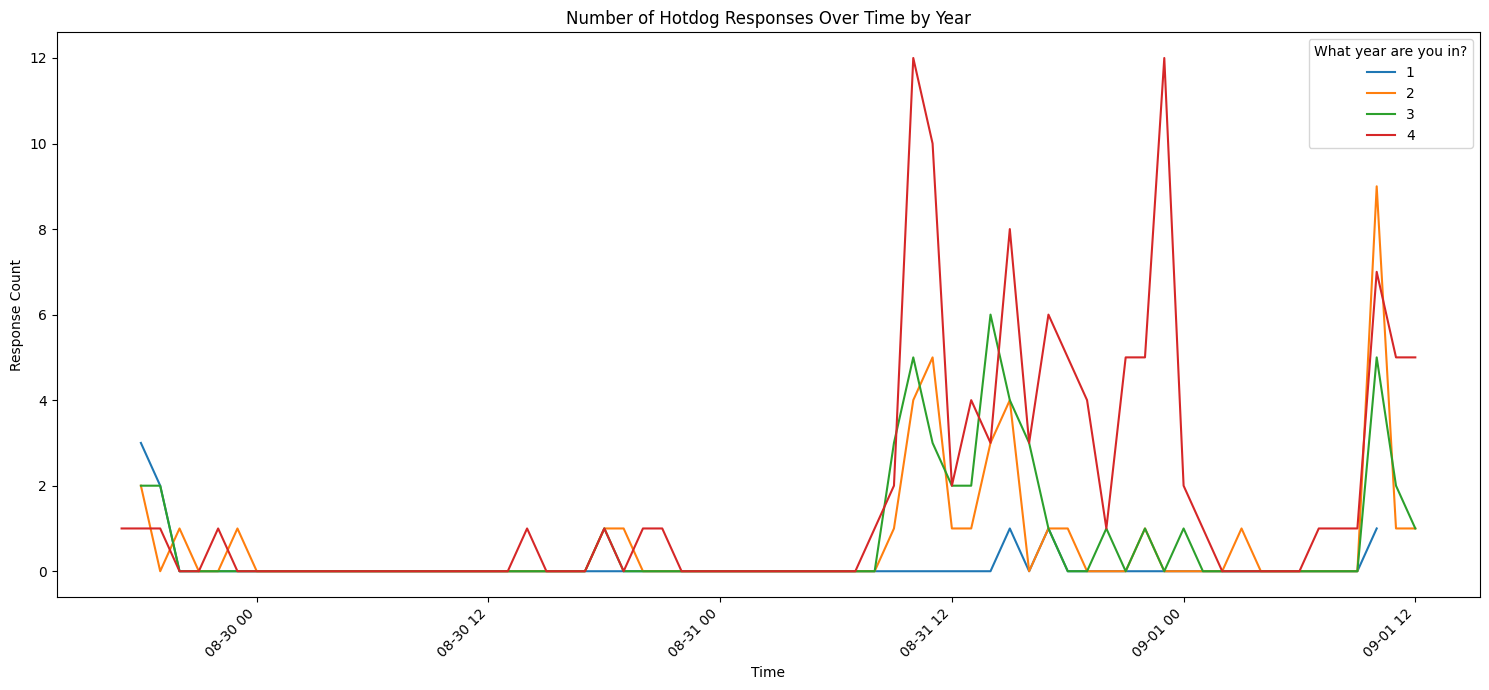

In [28]:
plt.figure(figsize=(15, 7))
sns.lineplot(data=responses_per_hour_per_year, x='Full_Timestamp', y='Response Count', hue='What year are you in?', palette='tab10')
plt.xlabel('Time')
plt.ylabel('Response Count')
plt.title('Number of Hotdog Responses Over Time by Year')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

*   The data from "hotdog\_data.xlsx" was successfully loaded into a pandas DataFrame.
*   A new column, 'Full\_Timestamp', was created containing datetime objects derived from the 'Timestamp' column.
*   The data was grouped by year and hourly time bins, and the number of responses for each group was counted.
*   A line graph was generated showing the number of responses over time, with separate lines representing different years.
*   The plot included the title 'Number of Hotdog Responses Over Time by Year', the x-axis label 'Time', and the y-axis label 'Number of Responses'.

### Insights or Next Steps

*   Analyze the peak times and days for responses within each year to understand response patterns.
*   Investigate potential external events that might have influenced the response trends in different years.
